In [1]:
!pip install torch

In [16]:
import torch
import torch.nn as nn
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
save_dir = "diffusion training data/"
def load_transitions():
    import os.path
    if not os.path.isfile(save_dir + "observations.npz"):
        print("No saved transitions found")
        return()
    #its stored as a dict so grab out the single array. and 0th axis should be the number of transitions
    observations = np.load(save_dir + "observations.npz")["arr_0"]
    actions = np.load(save_dir + "actions.npz")["arr_0"]
    rewards = np.load(save_dir + "rewards.npz")["arr_0"]
    dones = np.load(save_dir + "dones.npz")["arr_0"]
    assert(len(observations) == len(actions) == len(rewards) == len(dones))
    print("loaded transitions of length", len(observations))


    #crashes on codespaces
    # observations = torch.tensor(observations, dtype=torch.float32, device=device)
    # actions = torch.tensor(actions, dtype=torch.float32, device=device)
    # rewards = torch.tensor(rewards, dtype=torch.float32, device=device)
    # dones = torch.tensor(dones, dtype=torch.float32, device=device)

    return observations, actions, rewards, dones

In [18]:
observations, actions, rewards, dones = load_transitions()
print(observations[0].size, actions[0].size, rewards[0].size, dones[0].size)

loaded transitions of length 15280


: 

In [ ]:

class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Conv2d(in_channels = input_size, out_channels =hidden_size, kernel_size = 3, stride = 1, padding = 1)
        self.fc2 = nn.Linear(in_features=hidden_size, out_features=output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the input, hidden, and output sizes
input_size = 2 * observations[0].size + actions[0].size() #two screens of pong and the action taken on the last frame
hidden_size = 100 #arbitrary
output_size = observations[0].size + rewards[0].size() #one screen of pong + the reward

# Create an instance of the network
net = MyNetwork().to(device=device)


In [ ]:
#see https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

# define loss function and optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

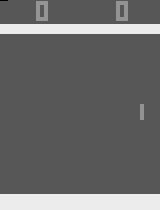

In [12]:
from PIL import Image
image = Image.fromarray(observations[0])
image.show()

In [13]:
gif = []
images = [Image.fromarray(observation) for observation in observations]
for image in images:
    gif.append(image)
gif[0].save('temp/result.gif', save_all=True,optimize=False, append_images=gif[1:], loop=0)